*Note: This notebook's purpose is to provide supplemental material to accomodate the latex report. The order of this notebook is also different than the order of the final paper. The verbage may be slightly different than the verbage in the final paper. Also, the statistical analysis done in this report is different than the statistical analysis reported in the paper. To look at the statistical analysis source code, please refer to the R project*

# GDELT: Research In The South Pacific

Written by Derek Lilienthal (California State University, Monterey Bay) <br> 
Advisor: Dr. Elizabeth Gooch (Naval Postgraduate School)

<h1> Abstract </h1>

In this research, we quantify foreign actors media activities in the South Pacific involving an environmental theme. We use the GDELT (Global Database of Events, Language, and Tone) data set to compare the tones of articles produced by Western, Chinese, and South Pacific (Local) media sources that involve an environmental theme and when a great power (United States, China, Australia, New Zealand, Japan, and Russia) is involved as an actor. We found that when comparing Western, Chinese, and Local news sources, the average sentimental analysis of Western tones is negative, the average of Local tones is slightly positive, and the average of Chinese tones are very positive. When comparing the difference in means by each set of sources, we used the Welch’s Two Sample t-test because the distribution of Western, Chinese, and Local tones followed a normal distribution but had unequal variances among groups. After conducting our statistical analysis, we found there is strong evidence to conclude the difference in means of tones between the three media sources are statistically significant between each pairwise comparison. 

<h1> Introduction </h1>

The GDELT (Global Database of Events, Language and Tone) Project's goal is to create a platform that monitors the world’s news media from nearly every corner of every country in print, broadcast, and web formats [1]. GDELT provides a big data resource to analyze the world's news that allows researchers to explore trends in media that was not easily accessible before. GDELT stores all its data in a relational database that is freely accessible through Googles BigQuery platform. BigQuery allows researchers to use standard SQL to access the data. GDELT also updates it's database every 15 minutes [2]. This makes it possible to track events as they are happening in almost real time.

The amount of raw data that GDELT gives researchers is monumental. For example, in one of the relational database tables we focus on in this research, there are over five billion unique entries. The GDELT project database itself has over 50 tables available through BigQuery, but for the purpose of this research, we will solely be focusing on three of GDELT's tables. The Events, Eventmentions, and GKG (Global Knowledge Graph). 

The Events table is where GDELT creates a new entry for each brand-new event, the Eventmentions table is where GDELT tracks the life of each event as it spans across more media outlets and as the event continues to develop, and the GKG table is a detailed analysis of every news article itself [3][4].

An example on how these three tables relate to each other, if Fox News is the first to report on about a political scandal, the event will first have an entry in the Events table. After 15 minutes, any follow-up news articles, or if a different media outlet like CNN, that report on the same event will all be seperate entries in the Eventmentions table. Each event is uniquely identified by a unique id (GLOBALEVENTID) in the Events table that is also present in each entry in the Eventmentions table. This way, we can join both the Event and Eventmentions table on each events’ unique id. We can also track individual events by their *GLOBALEVENTID*. The GKG table however uniquely identifies each event by the article’s URL. This way, we can join the Eventmentions and GKG tables through each events URL because the Eventmentions table also has the source URL of where the article originated from. Thus, allowing us to join the Events, Eventmentions, and GKG tables collectively to form our entire data set that we will be using throughout this research.

Each event in the Events table is stored in a CAMEO (Conflict and Mediation Event Observation) format where the two actors and the action performed by Actor1 upon Actor2 is recorded [4]. The Geographical location where the event took place is also recorded along with the geographical location where *Actor1* and *Actor2* reside from. If the event only involves one or no actors, then these attributes can be left blank [4].

The Eventmentions table is an extension of the Events table. It records all the mentions of each event as it spans across multiple news sources [4]. It will track an event as it spans past the first initial recording in the Events table. The Eventmentions table also includes more details about each entry compared to the Events table. Some of the note able additional attributes the Eventmentions table gives is the articles tone, actors character offset in the article, confidence level of the reported article is related to the *GLOBALEVENTID*, and many more attributes. While many of those attributes can be used to filter articles out articles based on length or the importance of an actor based on where it was located within the article, in this research the only attribute we are utilizing in the Eventmentions table will be its tone (MentionDocTone) [4]. 

The GKG table “connects every person, organization, location, count, theme, news source, and event across the planet into a single massive network that captures what’s happening around the world, what its connect is and who's involved, and how the world is feeling about it, every single day”.[3] In short terms, the GKG table gives an additional level of analysis on each event recorded in GDELT that can be used to filter articles by organizations, persons, themes, tones, locations, and more. For this research, we will be focusing on using the themes (V2Themes) and tones (V2Tone) of the GKG table. 

For the remainder of the report, we will be focusing on analyzing Western, Chinese, and Local media tones across the South Pacific when a great power is either *Actor1* or *Actor2*, the location of the event is a South Pacific country or territory, and the event involves an environmental theme. The great powers of interest in this research are: The United States, China, Australia, New Zealand, Japan, and Russia. 

The locations of interest in the South Pacific are: Micronesia, Fiji, Kiribati, Marshall Islands, Nauru, Palau, Papua New Guinea, Samoa, Solomon Islands, Tonga, Tuvalu, Vanuatu, Cook Islands, Niue, American Samoa, Ashmore Reef, Baker Island, Coral Sea, Easter Island, Galapagos Islands, French Polynesia, Guam, Howland Island, Jarvis Island, Johnston Atoll, Kingman Reef, Midway Island, New Caledonia, Norfolk Island, Norther Mariana Islands, Ogasawaramura Japan, Palmyra Atoll, Papua Indonesia, Pitcairn Islands, Tokelau, Wake Island, Wallis and Futuna, West Papua, and Bonin Islands. 

*We did not include every location in the South Pacific (Hawaii, New Zealand and Australia) because those three locations accounted for the majority of all the entries in our South Pacific subset of data from GDELT.*

In [1]:
# Load in all the imports and set default settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(color_codes=True)
sns.set(font_scale=2)
color1 = '#003f5c'
color2 = '#bc5090'
color3 = '#ffa600'

<em> To hide all the code in this report in Jupyter Notebooks, press the button below </em>

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

<h1> Data </h1>

<h3> Articles in the South Pacific </h3>

To gain a perspective of GDELT and the nations in the South Pacific within GDELT, we need to know what percentage of articles/events take place in the South Pacific. To answer this question, there is a few things we need to know. The first one is how many events are in GDELT itself and the second is dividing that amount of how many articles are in the South Pacific.

To get the total number of articles within GDELT itself, i constructed a query to count all the articles when joining the three tables of interest. Events, Eventmentions, and GKG. 

    SELECT 
        count(1) 
    FROM 
      `gdelt-bq.gdeltv2.eventmentions_partitioned` AS eventmentions JOIN `gdelt-bq.gdeltv2.events_partitioned` AS events ON eventmentions.GLOBALEVENTID = events.GLOBALEVENTID INNER JOIN `gdelt-bq.gdeltv2.gkg_partitioned`AS GKG ON eventmentions.MentionIdentifier = GKG.DocumentIdentifier

This query was pulled on 11/03/2020 @ 11:25 PM PST <br>
It produced a result of: <b> 5563232445 </b> <br>
This means there are 5,563,232,445 articles contained in all of GDELT as of that instance in time.

Next, to get the total number of articles that take place in the South Pacific, i constructed a query to count all the articles in GDELT using the proper predicates needed to specify the only the locations of interest in the South Pacific. <br>
<em> Each location individual location is specified next to the predicate used to identify it within the query. </em>

    SELECT 
        count(1)
    FROM 
      `gdelt-bq.gdeltv2.eventmentions_partitioned` as eventmentions join `gdelt-bq.gdeltv2.events_partitioned` as events 
    ON eventmentions.GLOBALEVENTID = events.GLOBALEVENTID inner join `gdelt-bq.gdeltv2.gkg_partitioned`as GKG on eventmentions.MentionIdentifier = GKG.DocumentIdentifier
    WHERE 
      (ActionGeo_ADM1Code like 'FM%' -- Micronesia
      OR ActionGeo_ADM1Code like 'FJ%' -- Fiji
      OR ActionGeo_ADM1Code like 'KR%' -- Kiribati
      OR ActionGeo_ADM1Code like 'RM%' -- Marshall Islands
      OR ActionGeo_ADM1Code like 'NR%' -- Nauru
      OR ActionGeo_ADM1Code like 'PS%' -- Palau
      OR ActionGeo_ADM1Code like 'PP%' -- Papua New Guinea
      OR ActionGeo_ADM1Code like 'WS%' -- Samoa
      OR ActionGeo_ADM1Code like 'BP%' -- Solomon Islands
      OR ActionGeo_ADM1Code like 'TN%' -- Tonga
      OR ActionGeo_ADM1Code like 'TV%' -- Tuvalu
      OR ActionGeo_ADM1Code like 'NH%' -- Vanuatu
      OR ActionGeo_ADM1Code like 'CW%' -- Cook Islands
      OR ActionGeo_ADM1Code like 'NE%' -- Niue
      OR ActionGeo_ADM1Code like 'AQ%' -- American Samoa
      OR ActionGeo_FullName = 'Ashmore Reef, Queensland, Australia'
      OR ActionGeo_ADM1Code like 'FQ%' -- Baker Island
      OR ActionGeo_FullName = 'Coral Sea, Oceans (general), Oceans'
      OR ActionGeo_FullName like 'Easter Island, V%'
      OR ActionGeo_FullName = 'Galapagos, Imbabura, Ecuador'
      OR ActionGeo_ADM1Code like 'FP%' -- French Polynesia
      OR ActionGeo_ADM1Code like 'GQ%' -- Guam
      OR ActionGeo_ADM1Code like 'HQ%' -- Howland Island
      OR ActionGeo_ADM1Code like 'DQ%' -- Jarvis Island
      OR ActionGeo_ADM1Code like 'JQ%' -- Johnston Atoll
      OR ActionGeo_ADM1Code like 'KQ%' -- Kingman Reef
      OR ActionGeo_FullName = 'Midway Island, Western Australia, Australia'
      OR ActionGeo_ADM1Code like 'NC%' -- New Caledonia
      OR ActionGeo_ADM1Code like 'NF%' -- Norfold Island
      OR ActionGeo_ADM1Code like 'CQ%' -- Norther Mariana Islands
      OR ActionGeo_FullName = 'Ogasawaramura, Tokyo, Japan'
      OR ActionGeo_ADM1Code like 'LQ%' -- Palmyra Atoll
      OR ActionGeo_ADM1Code = 'ID36' -- Papua, Indonesia
      OR ActionGeo_ADM1Code like 'PC%' -- Pitcairn Islands
      OR ActionGeo_ADM1Code like 'TL%' -- Tokelau
      OR ActionGeo_ADM1Code like 'WQ%' -- Wake Island
      OR ActionGeo_ADM1Code like 'WF%' -- Wallis and Futuna
      OR ActionGeo_ADM1Code = 'ID39' -- West Papua, Indonesia
      OR ActionGeo_FullName = 'Bonin Islands, Tokyo, Japan')

This query was pulled on 11/03/2020 @ 11:23 PM PST <br>
It produced a result of: <b> 4315294 </b> <br>
This means there are 4,315,294 articles contained in all of GDELT as of that instance in time.

<em> Below is a visualization of the percentage of articles within GDELT that are located in the South Pacific. </em>

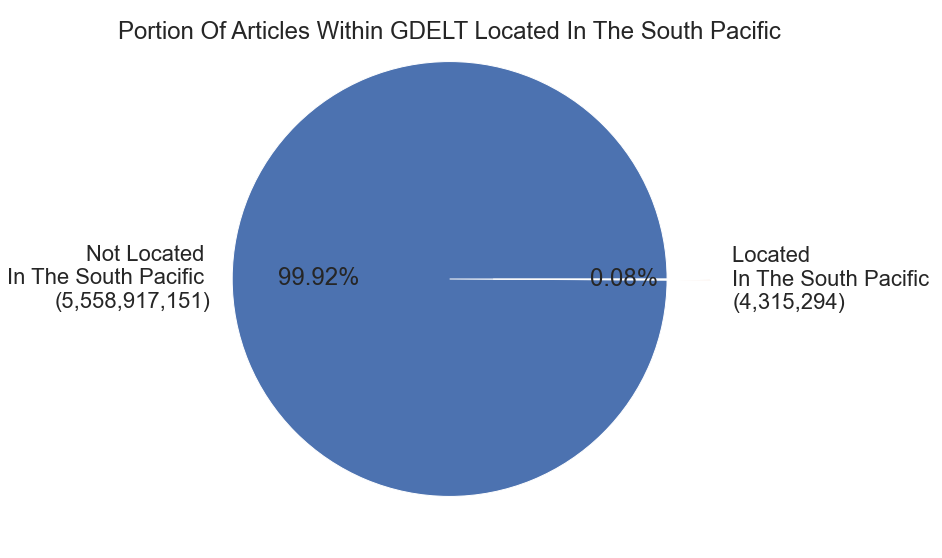

In [3]:
labels_g1 = 'Not Located \nIn The South Pacific \n(5,558,917,151)', 'Located \nIn The South Pacific \n(4,315,294)'
sizes_g1 = [5563232445, (5563232445 - (5563232445 - 4315294))]
explode = (0,0.2)
plt.pie(sizes_g1, explode=explode, labels=labels_g1, autopct='%1.2f%%')
plt.title("Portion Of Articles Within GDELT Located In The South Pacific", y=0.93);

Out of all the articles contained within GDELT, only <b>0.08%</b> of them are in the South Pacific.

<h3> Articles in the South Pacific involving an Environmental Issue </h3>

To further narrow our perspectives, i will be examining how many articles in the South Pacific are written that involve some environmental issue. 

<em>Note: The query used to pull the our final dataset uses the same predicate as the query shown above to count how many articles are contained in the South Pacific. The only difference is replacing <b>count(1)</b> with the targeted attributes. </em>

In [4]:
# Columns we need for the report
columns = ['Actor1CountryCode',
 'Actor2CountryCode',
 'AvgTone',
 'MentionDocTone',
 'SourceCommonName',
 'V2Themes',
 'V2Tone']

# Load in the data set
data_file = 'D:/UROC_CSV/Final Pull/Final_Pull.csv'
df = pd.read_csv(data_file, usecols=columns)
print('There are {} articles in this data set'.format(df.shape[0]))

There are 4323834 articles in this data set


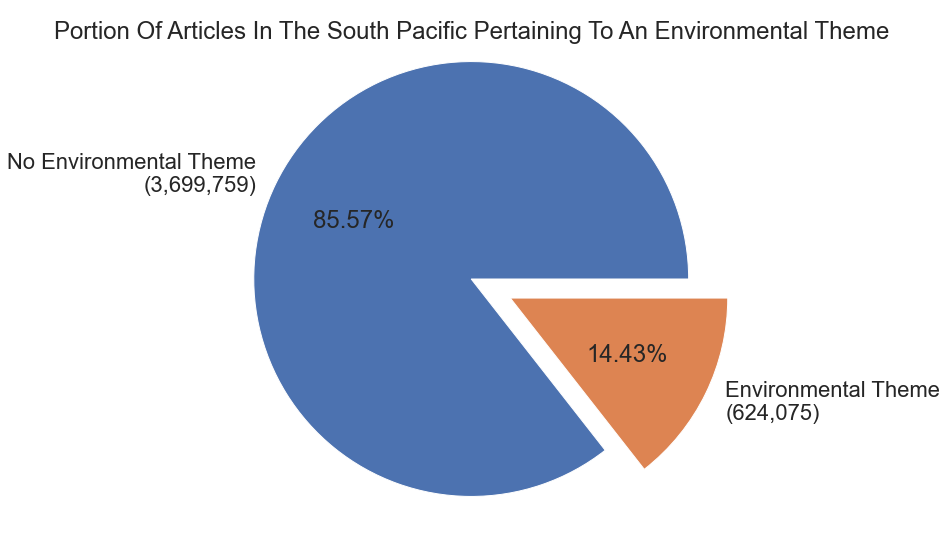

In [5]:
# Number of environmental articles
num_env_articles = df[df['V2Themes'].astype(str).str.contains('ENV_')].shape[0]
# Total number of articles 
num_total_articles = df.shape[0]

# Code for graph
labels_g2 = ['No Environmental Theme\n(3,699,759)', 'Environmental Theme\n(624,075)']
sizes_g2 = [(num_total_articles - num_env_articles), num_env_articles]
explode = (0,0.2)
plt.pie(sizes_g2, explode=explode, labels=labels_g2, autopct='%1.2f%%')
plt.title("Portion Of Articles In The South Pacific Pertaining To An Environmental Theme", y=0.93);

Of all the articles in GDELT in the South Pacific, <b>14.43%</b> involve an environmental issue and <b>85.57%</b> do not.

<h3> Portion of Articles With an Environment Theme in the South Pacific Involving a Great Power </h3>

To find the portion of articles with an environmental theme, i will need to know how many articles are located in the South Pacific and of those articles, how many of them involve a great power.

In [6]:
# Create boolean masks of each great power
df['Actor1CountryCode'] = df['Actor1CountryCode'].astype(str)
df['Actor2CountryCode'] = df['Actor2CountryCode'].astype(str)
usa_mask = ((df['Actor1CountryCode'] == 'USA') | (df['Actor2CountryCode'] == 'USA'))
chn_mask = ((df['Actor1CountryCode'] == 'CHN') | (df['Actor2CountryCode'] == 'CHN'))
aus_mask = ((df['Actor1CountryCode'] == 'AUS') | (df['Actor2CountryCode'] == 'AUS'))
nzl_mask = ((df['Actor1CountryCode'] == 'NZL') | (df['Actor2CountryCode'] == 'NZL'))
rus_mask = ((df['Actor1CountryCode'] == 'RUS') | (df['Actor2CountryCode'] == 'RUS'))
jpn_mask = ((df['Actor1CountryCode'] == 'JPN') | (df['Actor2CountryCode'] == 'JPN'))

# Filter the data set by only allowing articles that contain an ENV_ theme
df = df[df['V2Themes'].astype(str).str.contains('ENV_')]
num_of_env_articles = df.shape[0] # Total number of ENV_ articles within the data set

# Filter the data set by only allowing a great power being Actor1 or Actor2
df = df[(usa_mask | chn_mask | aus_mask | nzl_mask | rus_mask | jpn_mask)].copy()

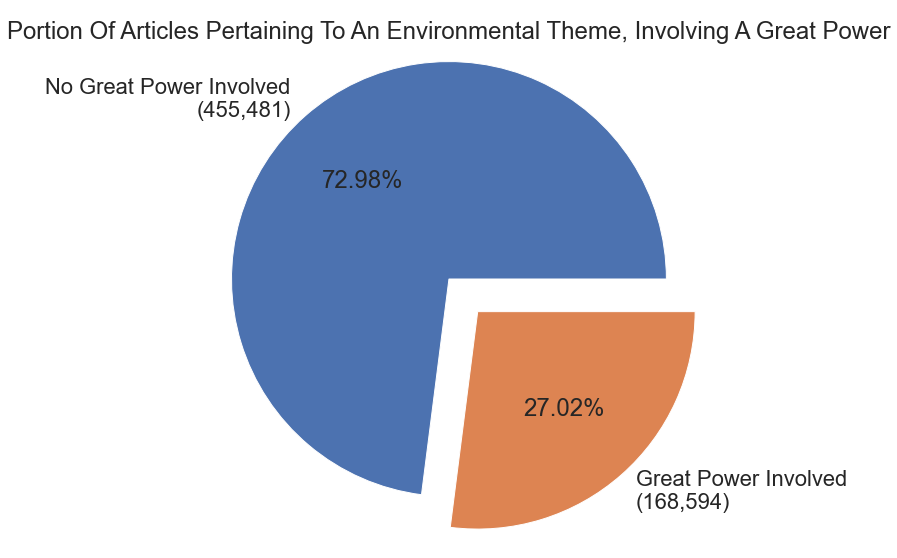

In [7]:
# Code for graph
labels_g3 = ['No Great Power Involved\n(455,481)', 'Great Power Involved\n(168,594)']
sizes_g3 = [(num_of_env_articles - df.shape[0]), df.shape[0]] 
explode = (0,0.2)
plt.pie(sizes_g3, explode=explode, labels=labels_g3, autopct='%1.2f%%')
plt.title("Portion Of Articles Pertaining To An Environmental Theme, Involving A Great Power", y=0.93);

Of all the articles in GDELT located in the South Pacific and that involve one of the great powers as an Actor1CountryCode or Actor2CountryCode, <b>27.02%</b> involve an environmental issue and <b>72.98%</b> do not.

<em> All plots together </em>

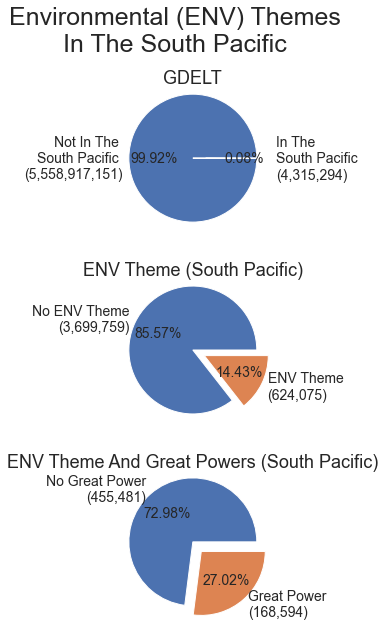

In [8]:
explode = (0,0.2)

labels_g1 = 'Not In The \nSouth Pacific \n(5,558,917,151)', 'In The \nSouth Pacific \n(4,315,294)'
labels_g2 = ['No ENV Theme\n(3,699,759)', 'ENV Theme\n(624,075)']
labels_g3 = ['No Great Power\n(455,481)', 'Great Power\n(168,594)']

fig, axes = plt.subplots(3,1)
axes[0].pie(sizes_g1, explode=explode, labels=labels_g1, autopct='%1.2f%%', textprops={'fontsize': 14})
axes[0].set_title("GDELT", y=0.93, fontsize=18)
axes[1].pie(sizes_g2, explode=explode, labels=labels_g2, autopct='%1.2f%%', textprops={'fontsize': 14})
axes[1].set_title("ENV Theme (South Pacific)", y=0.93, fontsize=18)
axes[2].pie(sizes_g3, explode=explode, labels=labels_g3, autopct='%1.2f%%', textprops={'fontsize': 14})
axes[2].set_title("ENV Theme And Great Powers (South Pacific)", y=0.93, fontsize=18)
#plt.tight_layout()
plt.suptitle('Environmental (ENV) Themes\nIn The South Pacific', fontsize=25);

<h3> Portion of Articles With an Environment Theme in the South Pacific by Great Power </h3>

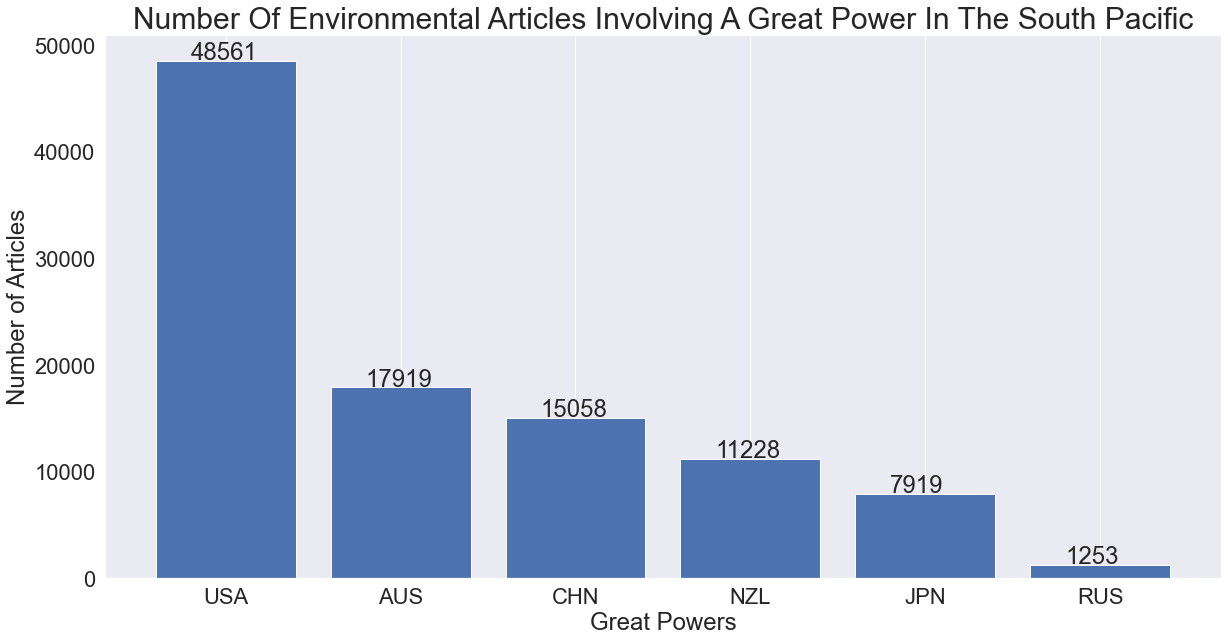

In [9]:
great_powers = ['USA','JPN','CHN','NZL','AUS','RUS']
temp_dic = {}

# This function counts all the intances of a great power as Actor1/2CountryCode and stores the results into a dictionary
def countGP(gp):
    mask = (df['Actor1CountryCode'] == gp) | (df['Actor2CountryCode'] == gp)
    temp_dic[gp] = int(df['Actor1CountryCode'][mask].value_counts()[:1].values)

# Itterate through all the great powers in dataset
for gp in great_powers:
    countGP(gp)

# Sort the dictionary results
result_dict = {k: v for k, v in sorted(temp_dic.items(), key=lambda item: item[1], reverse=True)}
# Plot
ax = plt.bar(result_dict.keys(), result_dict.values())
plt.title("Number Of Environmental Articles Involving A Great Power In The South Pacific", fontsize=30)
plt.xlabel("Great Powers")
plt.ylabel("Number of Articles")
plt.grid(axis='y')

# Add the labels
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+.2, col.get_height() + 100, list(result_dict.values())[i])

The United States has over 48 thousand articles written where they were involved in the South Pacific and there is an environmental theme. 

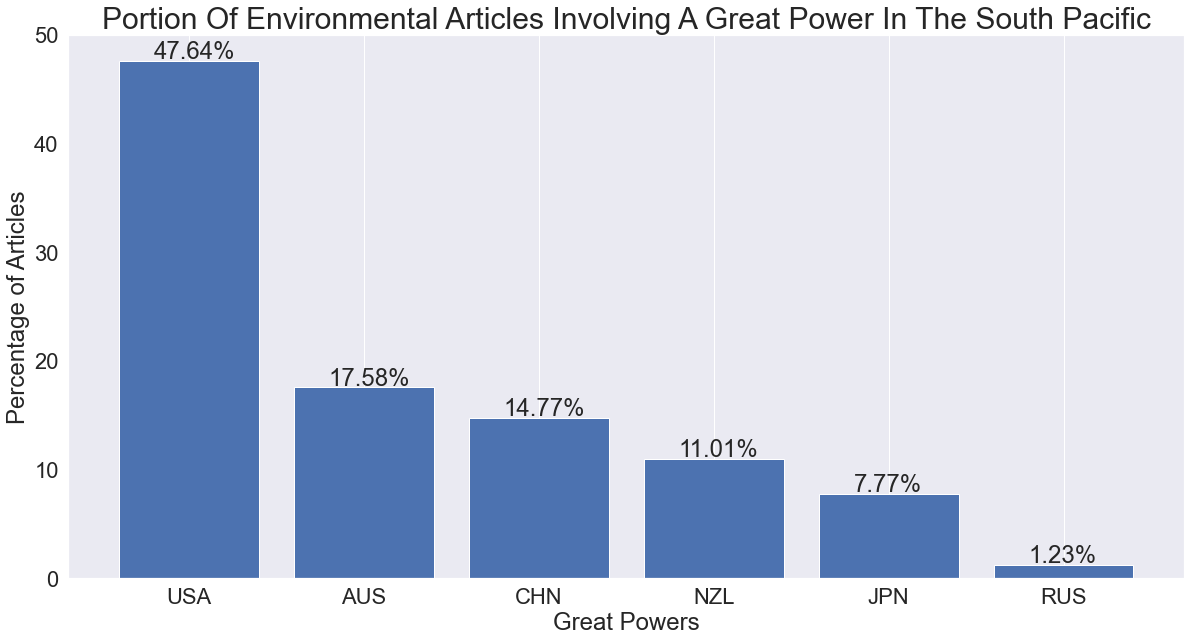

In [10]:
# This function takes in a dictionary and normalizes all the values
def normalize(d):
   raw = sum(d.values())
   factor = 100.0/raw
   return {key:value*factor for key,value in d.items()}

result_dict = normalize(result_dict)
result_dict = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

# Plot
ax = plt.bar(result_dict.keys(), result_dict.values())
plt.title("Portion Of Environmental Articles Involving A Great Power In The South Pacific", fontsize=30)
plt.xlabel("Great Powers")
plt.ylabel("Percentage of Articles")
plt.grid(axis='y')
plt.tick_params(axis='y')

# Add the percentage labels
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+.2, col.get_height() + 0.2, str(round(list(result_dict.values())[i],2))+"%")

<b> Both Graphs together </b>

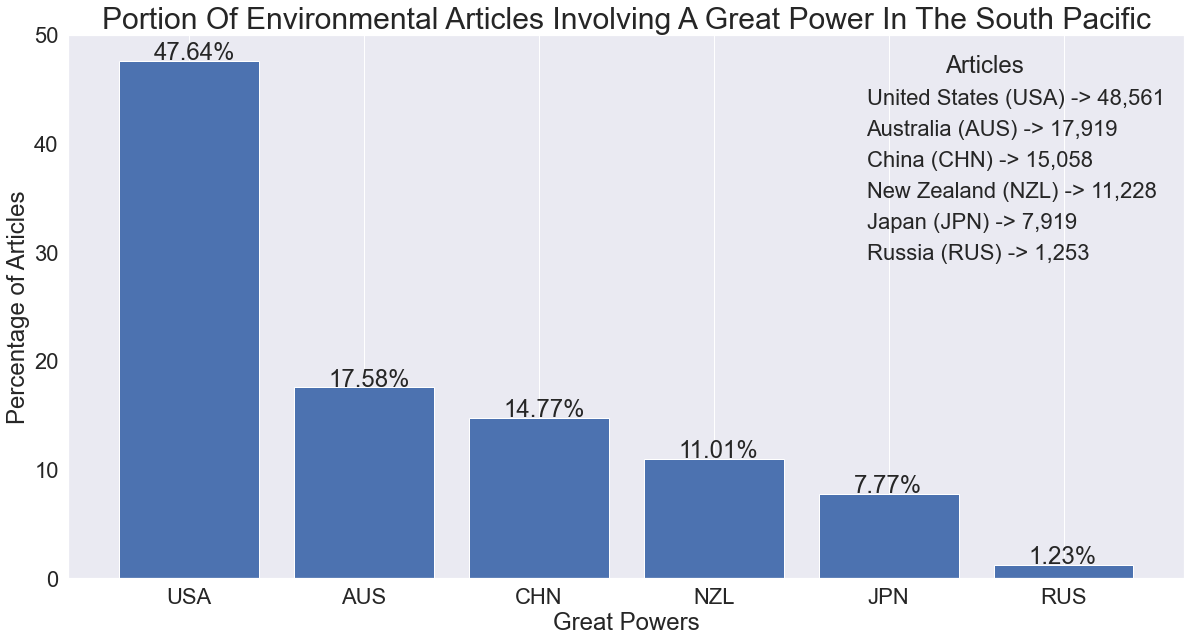

In [11]:
# Plot
ax = plt.bar(result_dict.keys(), result_dict.values())
plt.title("Portion Of Environmental Articles Involving A Great Power In The South Pacific", fontsize=30)
plt.xlabel("Great Powers")
plt.ylabel("Percentage of Articles")
plt.grid(axis='y')
plt.tick_params(axis='y')

# Add the labels
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+.2, col.get_height() +0.1 , str(round(list(result_dict.values())[i],2))+"%")
    
legend_usa = mpatches.Patch(color='none', label='United States (USA) -> 48,561')
legend_aus = mpatches.Patch(color='none', label='Australia (AUS) -> 17,919')
legend_chn = mpatches.Patch(color='none', label='China (CHN) -> 15,058')
legend_nzl = mpatches.Patch(color='none', label='New Zealand (NZL) -> 11,228')
legend_jpn = mpatches.Patch(color='none', label='Japan (JPN) -> 7,919')
legend_rus = mpatches.Patch(color='none', label='Russia (RUS) -> 1,253')

plt.legend(title='Articles',handles=[legend_usa, legend_aus, legend_chn, legend_nzl, legend_jpn, legend_rus], frameon=False);

The United States accounts for the majority of articles in the South Pacific involving a great power one of these six great powers and an environmental theme. 

There are <b>168,594</b> articles in the Environmental South Pacific that involve a Great Power. <br>

<h3> Portion of environmental South Pacific articles involving a great power that were reported on by local sources </h3>

In order to count how many of those articles have been reported on by local sources, i will need to tabulate all the instances where a local source is the source name.

In [12]:
# Create a list of local sources
local_sources = ['samoanews.com', 'samoaobserver.ws', 'solomonstarnews.com',
                 'solomontimes.com', 'islandsun.com.sb', 'saipantribune.com',
                 'fijisun.com.fj', 'fijitimes.com', 'fijivillage.com',
                 'fiji.gov.fj', 'fijione.tv', 'thejetnewspaper.com',
                 'islandsbusiness.com', 'kpress.info', 'presidence.pf',
                 'ladepeche.pf', 'guampdn.com', 'kuam.com',
                 'pacificnewscenter.com', 'mvguam.com', 'postguam.com',
                 'pncguam.com', 'dailypost.vu', 'nouvellecaledonie.la1ere.fr',
                 'postcourier.com.pg', 'emtv.com.pg', 'thenational.com.pg',
                 'marshallislandsjournal.com', 'tonga-broadcasting.net', 'matangitonga.to',
                 'tongadailynews.to', 'parliament.gov.to', 'mic.gov.to',
                 'planet-tonga.com']

# Create a list of western sources
western_sources = ["yahoo.com", "bbc.co.uk", "foxnews.com", 
                   "nbcnews.com", "go.com", "cbsnews.com", 
                   "nytimes.com", "msn.com", "usatoday.com", 
                   "npr.org"]

# Create a list of chinese sources
chinese_sources = ["xinhuanet.com", "chinadaily.com.cn", "china.org.cn", 
                   "ecns.cn", "peopledaily.com.cn"]

In [13]:
num_local_articles = 0
for row in df['SourceCommonName'].astype(str):
    for source in local_sources:
        if source in row:
            num_local_articles += 1
print("There are {} articles in the South Pacific write by local new sources".format(num_local_articles))

There are 10292 articles in the South Pacific write by local new sources


In [14]:
portion = (num_local_articles / df.shape[0]) * 100
print("There portion of articles in the South Pacific in GDELT writen by local sources involving an environmental theme and a great power is {:.2f}%".format(portion))

There portion of articles in the South Pacific in GDELT writen by local sources involving an environmental theme and a great power is 6.10%


Only <b>6.10%</b> of the articles involving a great power and an environment theme in the South Pacific are reported on by the local news sources of South Pacific. The other <b>93.90%</b> of articles are reported on news sources that are not based in the South Pacific. 

<h3> Comparing Western, Chinese, and Local Media Tones </h3>

Now that we have established the portions of articles in GDELT that are in the South Pacific, the portion of articles between each great power, and the portion of articles involving an environmental theme reported on by a local source. We will now start looking at the tones between Western, Chinese and Local sources.  

In [15]:
"""
In order to do calculations on the next few tones, i will need to split the GKG Tone 
into separate components in order to efficiently calculate the GKG tone
"""

def split_tone(df):
    temp = df.split(",")
    return temp[0]

df['GKG_Tone'] = df['V2Tone'].apply(split_tone)

In [16]:
# Convert the columns into float data-types
df['GKG_Tone'] = df['GKG_Tone'].astype(float)
df['AvgTone'] = df['AvgTone'].astype(float)
df['MentionDocTone'] = df['MentionDocTone'].astype(float)

In [17]:
# Create lists to store the average tones to compare later
avg_chinese_tones = []
avg_western_tones = []
avg_local_tones = []
# Create variables to store the number of entries
chinese_count = 0
western_count = 0
local_count = 0

<b> Western Sources Tone </b>

First, i will look at the tones of western news sources. 

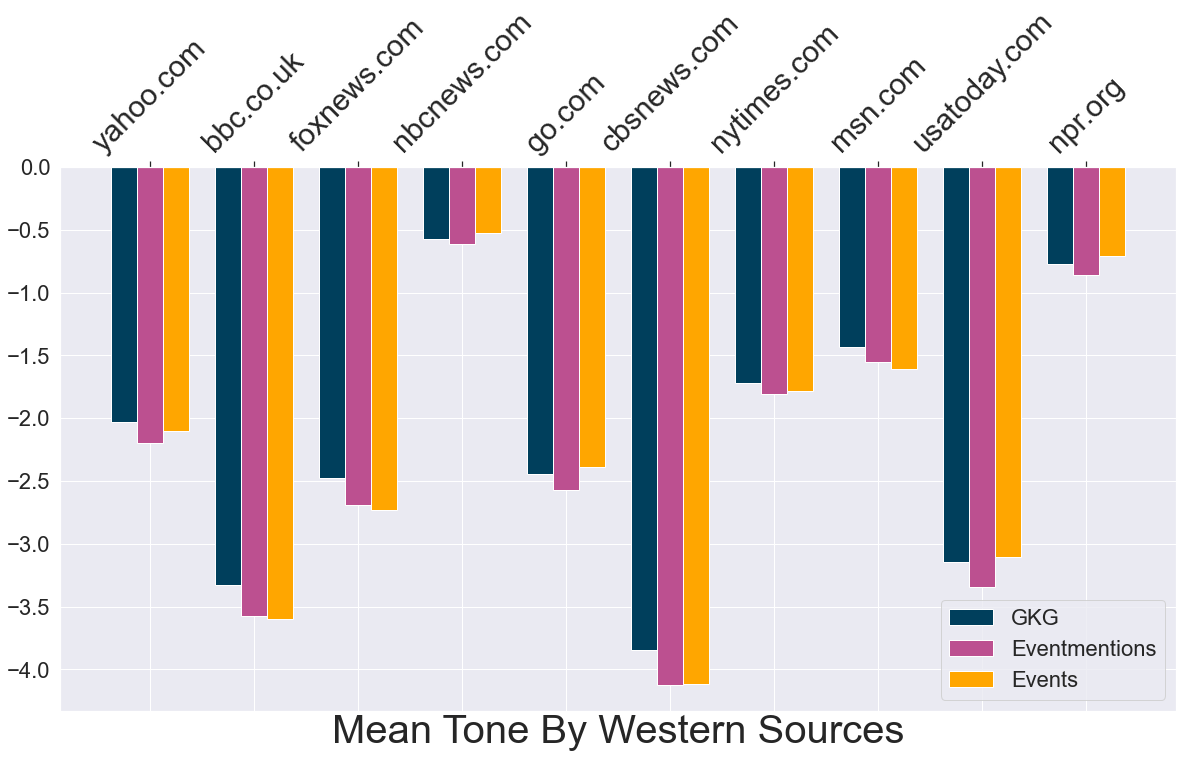

In [18]:
# Store the results to compute a weighted average
result_gkg = []
result_em = []
result_e = []
num_articles = []

# Loop through each one of the western sources and take the average of each one
for w_source in western_sources:
    avg_tone_gkg = df[df['SourceCommonName'] == w_source]['GKG_Tone'].mean()
    avg_tone_e = df[df['SourceCommonName'] == w_source]['AvgTone'].mean()
    avg_tone_em = df[df['SourceCommonName'] == w_source]['MentionDocTone'].mean()
    num_art = df[df['SourceCommonName'] == w_source].shape[0]
    num_articles.append(num_art)
    result_gkg.append(avg_tone_gkg)
    result_em.append(avg_tone_em)
    result_e.append(avg_tone_e)
    
# Save the total number of articles
western_count = sum(num_articles)
    
# Code for graph    
labels = ["GKG","Eventmentions","Events"]
fig, ax = plt.subplots()

x = np.arange(len(western_sources))
width = 0.25

r1 = np.arange(len(western_sources))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

ax.bar(r1, result_gkg, color=color1, width=width, label='GKG')
ax.bar(r2, result_em, color=color2, width=width, label='Eventmentions')
ax.bar(r3, result_e, color=color3, width=width, label='Events')
ax.set_xlabel('Mean Tone By Western Sources', fontsize=40)
plt.xticks([r + width for r in range(len(western_sources))], western_sources)
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelsize=30, rotation=45)
ax.legend();

All of the tones of Western news sources are negative when a great power is an actor in the South Pacific and the event involves an environmental theme.

Next, i compute the weighted averages of all three of the tones <em>(GKG, EventMentions, Events)</em>.

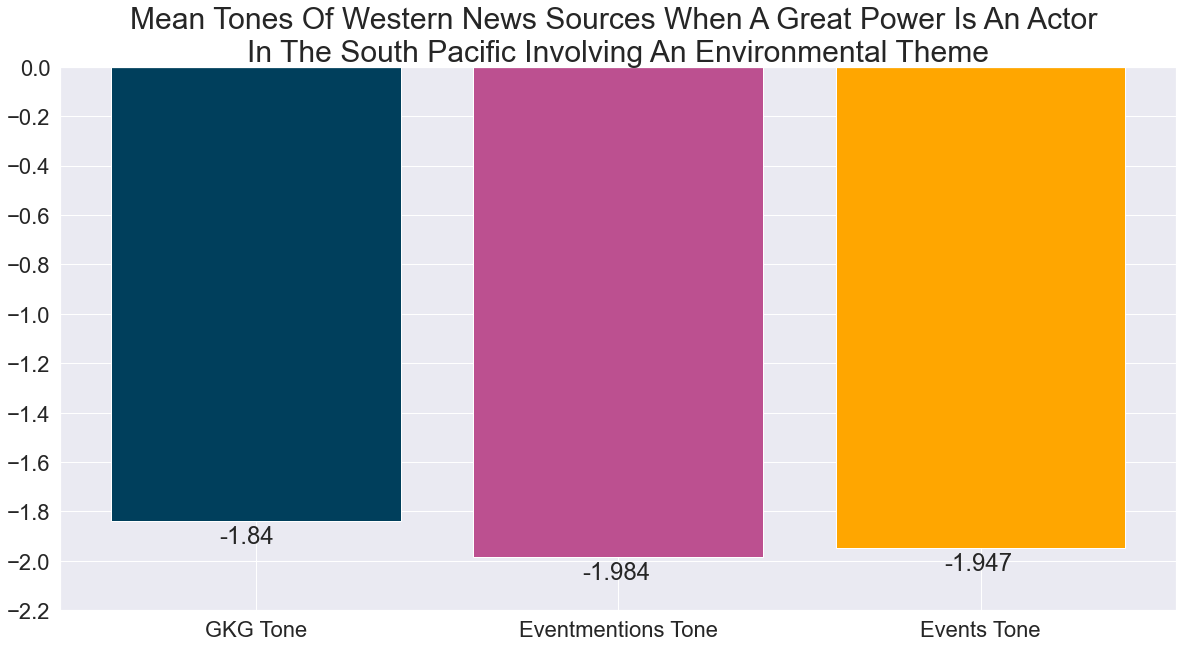

In [17]:
# Graphing the average tones
labels = ["GKG Tone","Eventmentions Tone","Events Tone"]
heights = []
    
# Computing weighted average for GKG
tot_articles = 0
avg_list = []
for i in range(0,len(result_gkg)):
    avg_list.append(num_articles[i]*result_gkg[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

# Computing weighted average for Eventmentions
tot_articles = 0
avg_list = []
for i in range(0,len(result_em)):
    avg_list.append(num_articles[i]*result_em[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

# Computing weighted average for Events
tot_articles = 0
avg_list = []
for i in range(0,len(result_e)):
    avg_list.append(num_articles[i]*result_e[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

# Add tones to a list to further evaluate later
avg_western_tones.append(heights)

# Code for graph
ax = plt.bar([1,2,3], heights, color=(color1, color2, color3))
plt.xticks([1,2,3], labels)
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+0.3, col.get_height()-0.09, heights[i].round(3))
plt.yticks([0.0,-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6,-1.8,-2.0,-2.2])
plt.title('Mean Tones Of Western News Sources When A Great Power Is An Actor \nIn The South Pacific Involving An Environmental Theme', fontsize=30);

With an overall average of around -1.84 to -1.98, this means that western news sources overall have a significantly negative tone when writing about an article involving the environment in the South Pacific.

<b> Chinese Sources Tone </b>

Next, i will do the same calculations as above to look at the tones of Chinese news sources. 

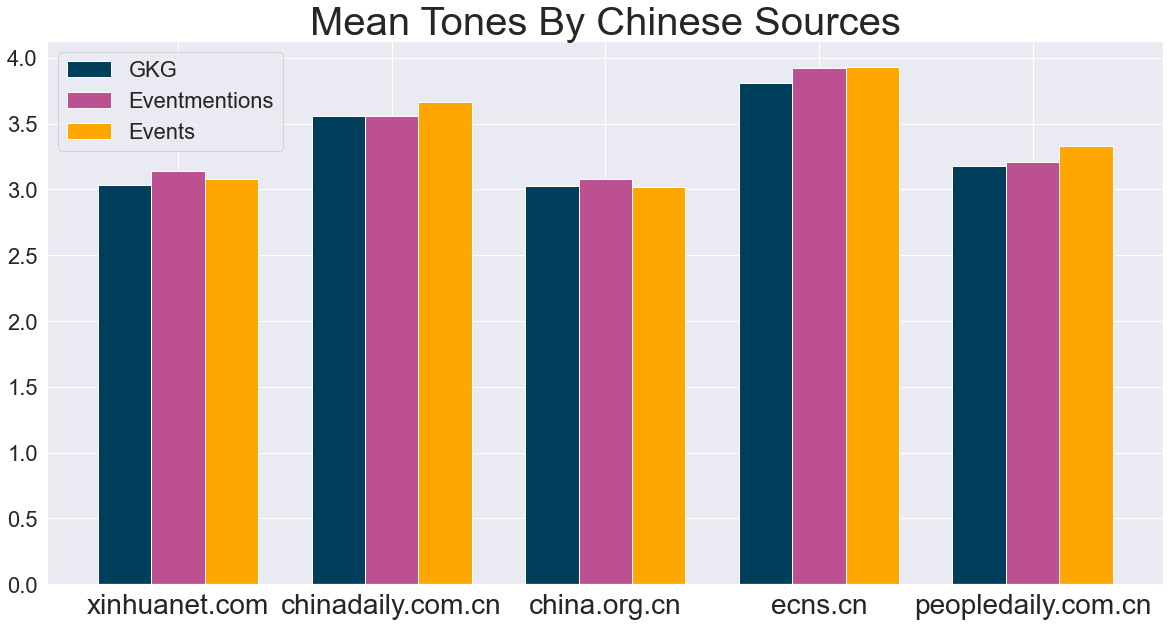

In [20]:
result_gkg = []
result_em = []
result_e = []
num_articles = []

for c_source in chinese_sources:
    avg_tone_gkg = df[df['SourceCommonName'] == c_source]['GKG_Tone'].mean()
    avg_tone_e = df[df['SourceCommonName'] == c_source]['AvgTone'].mean()
    avg_tone_em = df[df['SourceCommonName'] == c_source]['MentionDocTone'].mean()
    num_art = df[df['SourceCommonName'] == c_source].shape[0]
    num_articles.append(num_art)
    result_gkg.append(avg_tone_gkg)
    result_em.append(avg_tone_em)
    result_e.append(avg_tone_e)
    
chinese_count = sum(num_articles)
  
labels = ["GKG","Eventmentions","Events"]
fig, ax = plt.subplots()

x = np.arange(len(chinese_sources))
width = 0.25

r1 = np.arange(len(chinese_sources))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

ax.bar(r1, result_gkg, color=color1, width=width, label='GKG')
ax.bar(r2, result_em, color=color2, width=width, label='Eventmentions')
ax.bar(r3, result_e, color=color3, width=width, label='Events')
ax.set_title('Mean Tones By Chinese Sources', fontsize=40)
plt.xticks([r + width for r in range(len(chinese_sources))], chinese_sources)
ax.tick_params(axis='x', labelsize=28, rotation=0)
ax.legend();

Weighted average of all three tones.

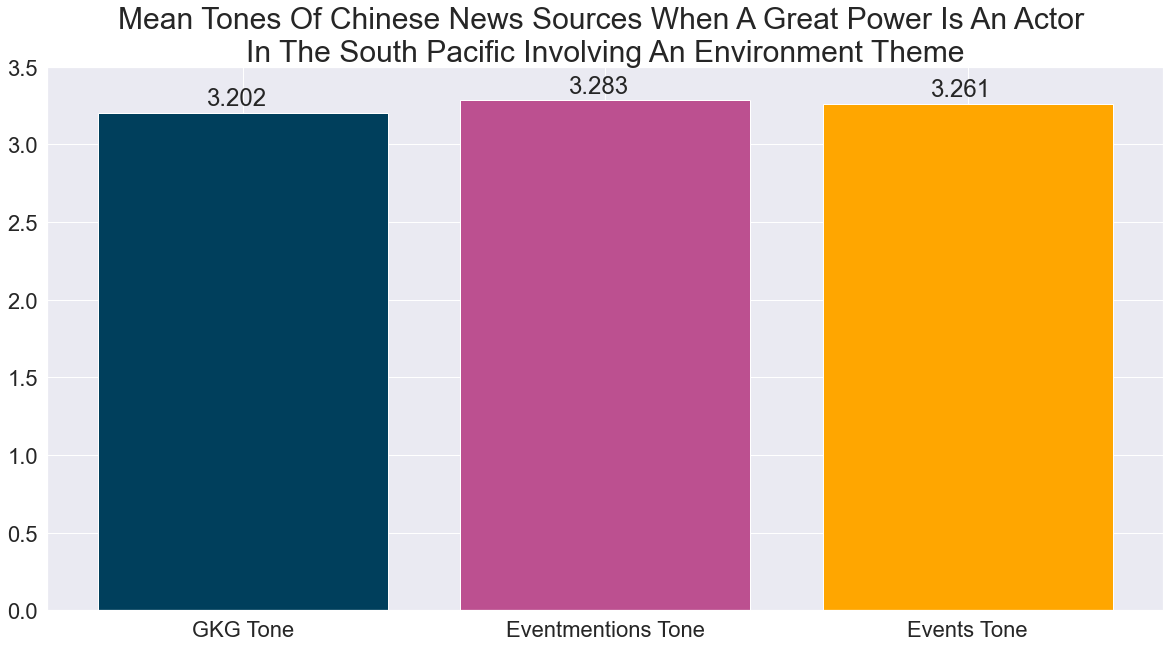

In [21]:
labels = ["GKG Tone","Eventmentions Tone","Events Tone"]
heights = []
    
# Computing weighted average
tot_articles = 0
avg_list = []
for i in range(0,len(result_gkg)):
    avg_list.append(num_articles[i]*result_gkg[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

tot_articles = 0
avg_list = []
for i in range(0,len(result_em)):
    avg_list.append(num_articles[i]*result_em[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

tot_articles = 0
avg_list = []
for i in range(0,len(result_e)):
    avg_list.append(num_articles[i]*result_e[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

# Add tones to a list to further evaluate later
avg_chinese_tones.append(heights)

# Code for graph
ax = plt.bar([1,2,3], heights, color=(color1, color2, color3))
plt.xticks([1,2,3], labels)
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+0.3, col.get_height()+0.05, heights[i].round(3))
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
plt.title('Mean Tones Of Chinese News Sources When A Great Power Is An Actor \nIn The South Pacific Involving An Environment Theme', fontsize=30);

With an overall average of around 3.2, this means that Chinese news sources overall have a very positive tone when writing about an article involving the environment in the South Pacific.

<b> Local Sources Tone </b>

Finally, i will look at the tones of local news sources. 

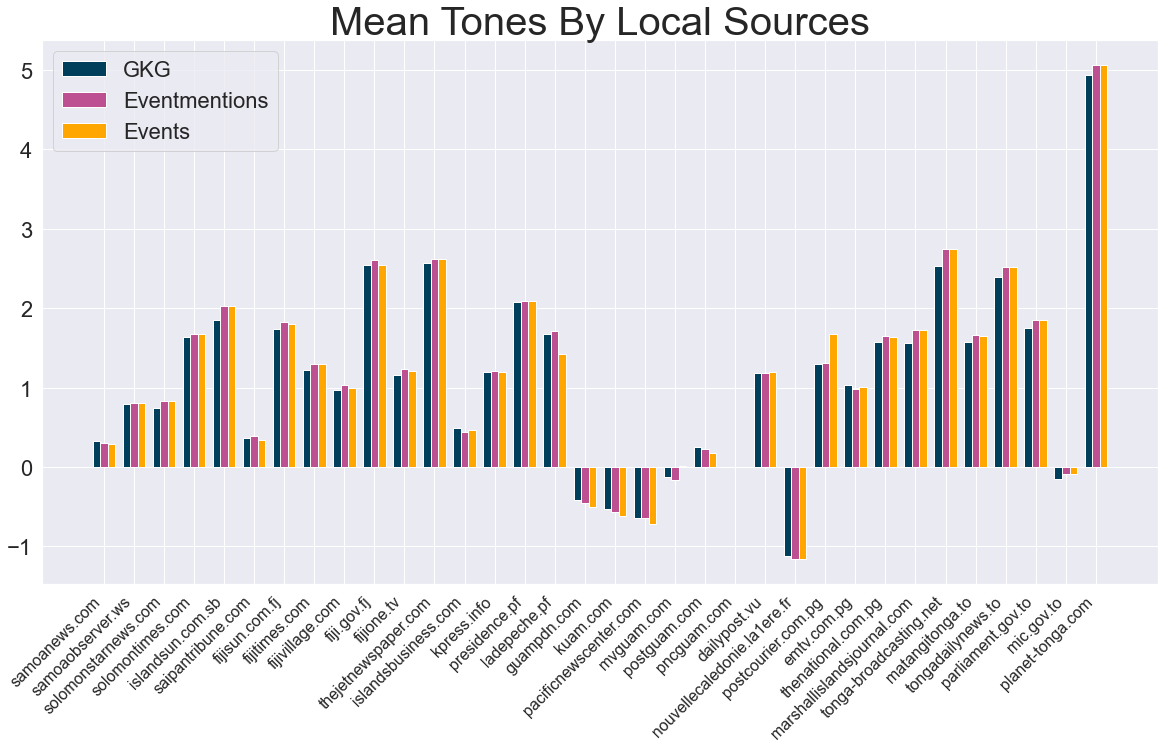

In [22]:
# Store the results to compute a weighted average
result_gkg = []
result_em = []
result_e = []
num_articles = []

# Loop through each one of the local sources and take the average of each one
for l_source in local_sources:
    avg_tone_gkg = df[df['SourceCommonName'] == l_source]['GKG_Tone'].mean()
    avg_tone_e = df[df['SourceCommonName'] == l_source]['AvgTone'].mean()
    avg_tone_em = df[df['SourceCommonName'] == l_source]['MentionDocTone'].mean()
    num_art = df[df['SourceCommonName'] == l_source].shape[0]
    num_articles.append(num_art)
    result_gkg.append(avg_tone_gkg)
    result_em.append(avg_tone_em)
    result_e.append(avg_tone_e)
    
# Save the total number of articles
local_count = sum(num_articles)
    
# Code for graph
labels = ["GKG","Eventmentions","Events"]
fig, ax = plt.subplots()

x = np.arange(len(local_sources))
width = 0.25

r1 = np.arange(len(local_sources))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

ax.bar(r1, result_gkg, color=color1, width=width, label='GKG')
ax.bar(r2, result_em, color=color2, width=width, label='Eventmentions')
ax.bar(r3, result_e, color=color3, width=width, label='Events')
ax.set_title('Mean Tones By Local Sources', fontsize=40)
plt.xticks([r + width for r in range(len(local_sources))], local_sources, rotation=45, horizontalalignment='right', fontsize=16)
ax.legend();

Most of the Local sources have positive tones when a great power is an actor in the South Pacific and the event involves an environmental theme.

Weighted average of all three tones.

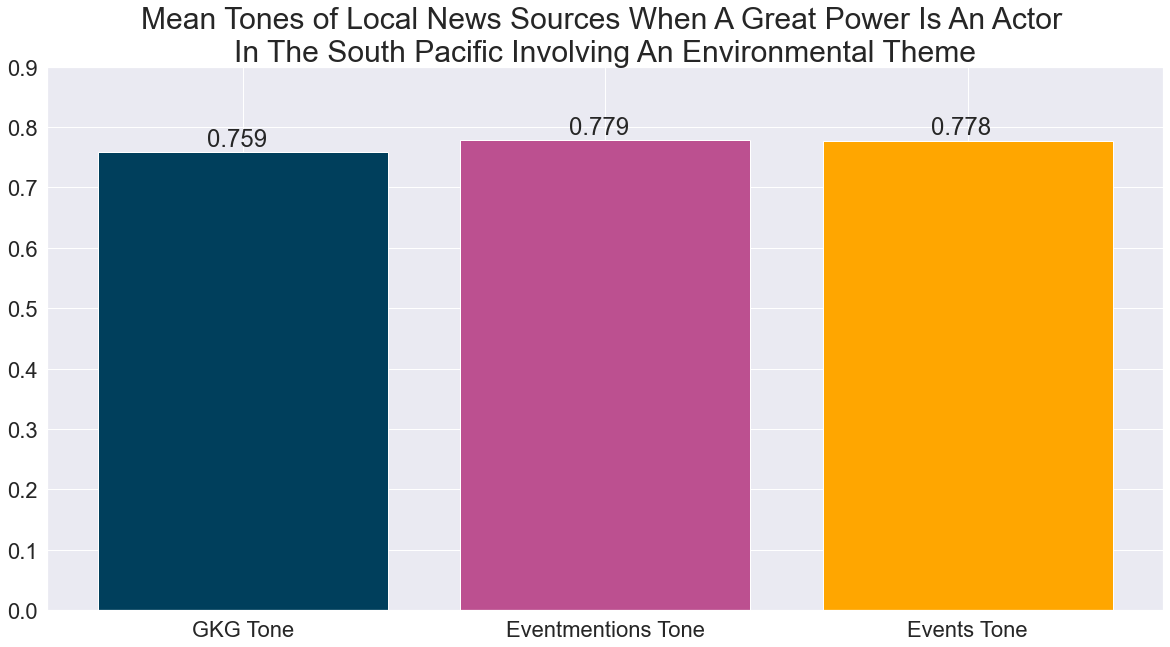

In [21]:
labels = ["GKG Tone","Eventmentions Tone","Events Tone"]
heights = []
    
# Computing weighted average
tot_articles = 0
avg_list = []
for i in range(0,len(result_gkg)):
    # Check to make sure it doesn't crash with a nan value
    if type(result_gkg[i]) is float:
        result_gkg[i] = 0
    avg_list.append(num_articles[i]*result_gkg[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

tot_articles = 0
avg_list = []
for i in range(0,len(result_em)):
    if type(result_em[i]) is float:
        result_em[i] = 0
    avg_list.append(num_articles[i]*result_em[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

tot_articles = 0
avg_list = []
for i in range(0,len(result_e)):
    if type(result_e[i]) is float:
        result_e[i] = 0
    avg_list.append(num_articles[i]*result_e[i])
    tot_articles += num_articles[i]
heights.append(sum(avg_list)/tot_articles)

# Add tones to a list to further evaluate later
avg_local_tones.append(heights)

# Code for graph
ax = plt.bar([1,2,3], heights, color=(color1, color2, color3))
plt.xticks([1,2,3], labels)
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+0.3, col.get_height()+0.01, heights[i].round(3))
plt.yticks(np.arange(0,1,0.1))
plt.title('Mean Tones of Local News Sources When A Great Power Is An Actor \nIn The South Pacific Involving An Environmental Theme', fontsize=30);

With an overall average of around 0.7, this means that local news sources overall have a neutral to slightly positive tone when writing about an article involving the environment in the South Pacific.

<h1> Methods </h1>

<b> Identifying all the locations in the South Pacific </b> 

Before creating a subset of data in the South Pacific, the first challenge was to identify all the location within the South Pacific and what there FIPS10-4 country codes are. GDELT uses the Federal Information Processing Standards (FIPS) codes to identify each events’ unique location. So, to only gather events in the South Pacific, I need a list of all the regions and there corresponding FIPS codes. 
The first place I took to find all the countries and territories was Wikipedia [4]. Wikipedia has a list of names of most of the sovereign states and dependent territories in the South Pacific. This list of names was a good list to start with. We also decided to excluded Australia and New Zealand from our initial list of nations to explore in our data because both of those nations are already well developed and are major influences on the many of the nations in the South Pacific. 

Once the list of countries and territories were created, next was to gather their location codes. To get their locations within GDELT I ran a query through BigQuery:<br>

    SELECT
        Actor1Name, Actor1CountryCode, Actor2Name, Actor2CountyCode, Actor1Geo_FullName Actor1Geo_CountryCode, Actor2Geo_FullName, Actor2Geo_CountryCode, ActionGeo_FullName, ActionGeo_ADM1Code 
    FROM 
        `gdelt-bq.gdeltv2.events_partitioned` 


And saved the results into one CSV (Comma Separated Values) file. Next, I manually searched the file in excel for each corresponding locations’ two-digit country code. I found this method to be the fastest and most precise way of finding each location in the South Pacific compared to other methods like individually querying for each location or searching other online resources. I could not trust the FIPS codes found on the internet because there were some instances where they did not match up to what GDELT uses to identify those locations. 

When using this method for finding the country code of each location in the south pacific, I was successful in identifying almost every region except for the locations of Territory of Ashmore and Cartier Islands, Galápagos Islands, Midway Islands, Ogasawara village, Papua Province, and West Papua. Searching for these locations returned some results that did not seem to match the location within the south pacific or did not return a result at all. Eventually, I was able to find the names and their country codes within GDELT after querying GDELT itself. I did however initially miss-identify West Papua's ActionGeo_ADM1Code for a different part of Indonesia. I eventually found the correct ActionGeo_ADM1Code for West Papua after a series of queries made against the GDELT data set on BigQuery and using google maps to confirm the regions. 


<b> ActionGeo_ADM1Code instead of ActionGeo_CountryCode </b>

When deciding how to create a data set of the South Pacific from the GDELT data set, I decided to use ActionGeo_ADM1Code as the main predicate in the query ran through BigQuery. There are two reasons that made me decide to use ActionGeo_ADM1Code instead of ActionGeo_CountryCode or ActionGeo_FullName in my query. The first is that I found that when trying to filter a location by explicitly stating the name of the region (ActionGeo_FullName) produced a dataset with less articles compared to using the ActionGeo_ADM1Code. For example, I found that when using the filtering by ActionGeo_FullName = 'Hawaii, United States' vs using ActionGeo_ADM1Code = 'USHI', (At the time of the initial query) there was 346,532 more articles that were found using ActionGeo_ADM1Code = 'USHI'. The second reason was for consistency in which predicates I was using within the query itself. Because every ActionGeo_ADM1Code is anywhere between 2 and 4 characters and the first two characters of the ActionGeo_ADM1Code are always the same as the ActionGeo_CountryCode, I will still capture the same number of articles using ActionGeo_ADM1Code as the predicate as we would using ActionGeo_CountryCode. 

Some locations within the South Pacific however are part of regions that are not entirely considered to be in the South Pacific. For example, Indonesia has two regions that are a part of the South Pacific, but Indonesia itself is not entirely in the South Pacific. To only get those specific regions of Indonesia, I had to explicitly state the whole ActionGeo_ADM1Code for West Papua and Papua. Also, the locations of Ashmore and Cartier Islands falls underneath an ActionGeo_ADM1Code that captures more than just that region. For this reason, I had to explicitly state the regions, using the ActionGeo_FullName, of Ashmore Reef, Queensland, Australia, Coral Sea Islands, Easter Island, the Galapagos Islands, Midway Islands, Ogasawaramura Islands, and the Bonin Islands. 

<b> Joining the Events, Eventmentions, and GKG </b>

To access all the attributes about each article (Themes and Tone), I had to join the Events, Eventmentions, and GKG table together. The Events and Eventmentions table joined on the GLOBALEVENTID's and the GKG joined to the Eventmentions table through the Eventmentions MentionIdentifier is the same as the GKG DocumentIdentifier. The GLOBALEVENTID is a unique identifier that is assigned to each event that is recorded within GDELT and the MentionIdentifier and DocumentIdentifier is the exact URL (or source) where the event was published. 
    
When joining all three tables together and using only the location predicates in my query, this result data set produced a table with 4,323,833 entries. When initially deciding which columns to also include in the data set, I decided to pull every column that could be of some relevance for this research. This meant excluding many of the attributes that are in the Events, Eventmentions, and GKG table. Even with excluding most attributes, this still led to a data set that was almost 20 GB (Gigabytes) in size. With such a massive data set produced from BigQuery, it presented its own challenges on how to perform certain aggregations. 
    
Because the Pandas library from Python stores the data frame in the computers RAM (Random Access Memory), this meant I could not store more than one instance of this data set at a time. This led to issues when I used the SQLite library using Python to perform queries on the data set. Because SQLite also stores its data base in memory (instead of the disk drive like a traditional SQL engine), I had to load the data set directly into SQLite from Pandas and delete the instance of that data set immediately after it was done to perform queries. To conserve memory within my computer, I eventually made mini data sets of only the attributes used in this research so I could hold both an instance of the data set in Pandas and in SQLite. Doing this allowed me to do data aggregation with SQL and then further analysis using Python without having to constantly drop one instance to use the other. 
However, I was eventually able to only use Python for all my data analysis, including the data wrangling, just from using the Pandas library. This allowed me to pull only the columns I needed from the larger data set. Which saved how much RAM was being occupied at any given time.  

<b> Pandas as the predicate to filter for themes </b>

In the GKG table, the two attributes of interest for this research are the Themes and the Tones. The Themes are how we were able to filter by only looking at certain events that involved the environment. The environmental themes of interest were filtered from the original data set by using a Pandas Data Frame’s Boolean mask combined with Pythons str.contains() method. This allowed us to create a data set that only contained articles where there is an environmental theme associated with it. 
There are 21 different environmental themes that GDELT has created: ENV_CLIMATECHANGE, ENV_OIL, ENV_FISHERY, ENV_MINING, ENV_COAL, ENV_GREEN,ENV_SOLAR, ENV_METALS, ENV_POACHING, ENV_NATURALGAS, ENV_DEFORESTATION, ENV_OVERFISH, ENV_FORESTRY, ENV_NUCLEARPOWER, ENV_WATERWAYS, ENV_SPECIESENDANGERED, ENV_HYDRO, ENV_BIOFUEL, ENV_GEOTHERMAL, ENV_WINDPOWER, ENV_CARBONCAPTURE and ENV_SPECIESEXTINCT. GDELT also has the World Bank themes included in the Themes column. The World Bank themes offer even greater details in their themes than what GDELT has provided with its own themes. But for this research, we only are filtering by the themes that begin with 'ENV_' because the World Bank themes do not follow a uniform structure. Therefore, making it exceedingly difficult to only filter by a certain kind of World Bank theme. 
    
<b> V2Themes vs Themes </b>

Within the GKG table, there are two themes columns. One is labeled Themes and the other V2Themes. After doing a detailed analysis of both columns, I concluded that both columns produced nearly identical results and choosing one over the other was not as important for this research. The major differences between the Themes and V2Themes is the V2Themes states the location within the article where the theme was identified. V2Themes also allows for the same theme to appear more than once in the column if it appears more than once in the event. The regular Themes is only a list of each unique theme as it appears in the event. For this research, I decided to use V2Themes instead of Themes when filtering by articles involving the environment. We could have, however, used the regular Themes and gotten the same results for this research. 
    
<b> Tones </b>
    
Even though the Events and Eventmentions tables also has a tone attribute, I wanted to present all three of them in this report. There is a slight difference on how each of the tones are calculated in each table. The tone in the Events table only represents the average tone of all the article that reported the event within the first 15 minutes it was first seen, the Eventmentions tone is the tone of each individual article, and the GKG tone is calculated from taking the average of the positive and negative score of the whole document [2,3]. The tones, and positive and negative scores are automatically generated by GDELT using sentiment analysis. The exact algorithms are not mentioned but GDELT promises that it is an advance Natural Language Processing (NLP) algorithm that generates these scores [3,5].
    
<b> Great Powers </b>

There is two ways that we can specify when looking for articles only involving the great powers of interest. The first way is by looking for the Actor1/2CountryCodes and the other is the Actor1/2Geo_CountryCode. While the ActorGeo_CountryCode method uses the FIPS country codes to specify who the actors are, the attribute Actor1CountryCode (and Actor2CountryCode) uses a 3-character CAMEO code for the country affiliations. There are resources online to find the Actor1/2CountryCode of each of the countries we are looking for. Instead of turning to the internet, I searched the data sets I had already created using Pandas functions. I was able to get the exact ActorCountryCodes this way and knew that these codes would give me what I was looking for. 
    
I decided to use the ActorCountryCode instead of ActorGeo_CountryCode as my means for creating a data set only containing the great powers because when comparing the results of using both, using Actor1/2Geo_CountryCode for specifying an actor produced a data set with less than half of the articles compared to using the Actor1/2CountryCode. The Events table in GDELT only specifies two actors and a location. So, if multiple actors are present, GDELT will either leave the field blank or will choose which actors take precedence in the article and assign those actors to those attributes. But the Actor1/2CountryCodes do not always match. For instance, "if the text refers to 'French Assistant Minister Smith was in Moscow', the CountryCode field will list France in the CountryCode field, while the geographic fields may list Moscow as the location". While this leads to potentially missing some articles involving certain actors, if we were to look for actors by either there location (ActorGeo_CountryCode) or there precedence in the article (ActorCountryCode), we may be including articles where we have an actors location who maybe was not an actor in the article itself. On the other hand, when specifying having the ActorCountryCode and ActorGeo_CountryCode matching, only produced a data set that only contained a fraction of the number of events (10's of thousands compared to hundreds of thousands). 

<b> Media Sources </b>

When finding the local media sources of the South Pacific, I created a function to output every unique media source that has involves a great power as Actor1 or Actor2. From there, my research mentor (Dr. Elizabeth Gooch) went through the list of sources for each individual location and cross checked each source to see if it was a local source. The Western news sources were selected because they give a range of liberal, conservative, and neutral media outlets. The Chinese news sources were select because each one of those news sources are either state-owned, state-ran, or authorized by the Chinese government. 

<b> Calculating the tones for all the media sources </b>

Once I had the geographical locations, the CAMEO codes for each great power, and the proper filtering methods for creating subsets of data, I then created multiple Python functions to compute the average weighted tone for each news source in the South Pacific. 

<h1> Results </h1>

Below is a visualization of each of each of the media sources and there average tones in the South Pacific, involving a great power, and involving the environment. 

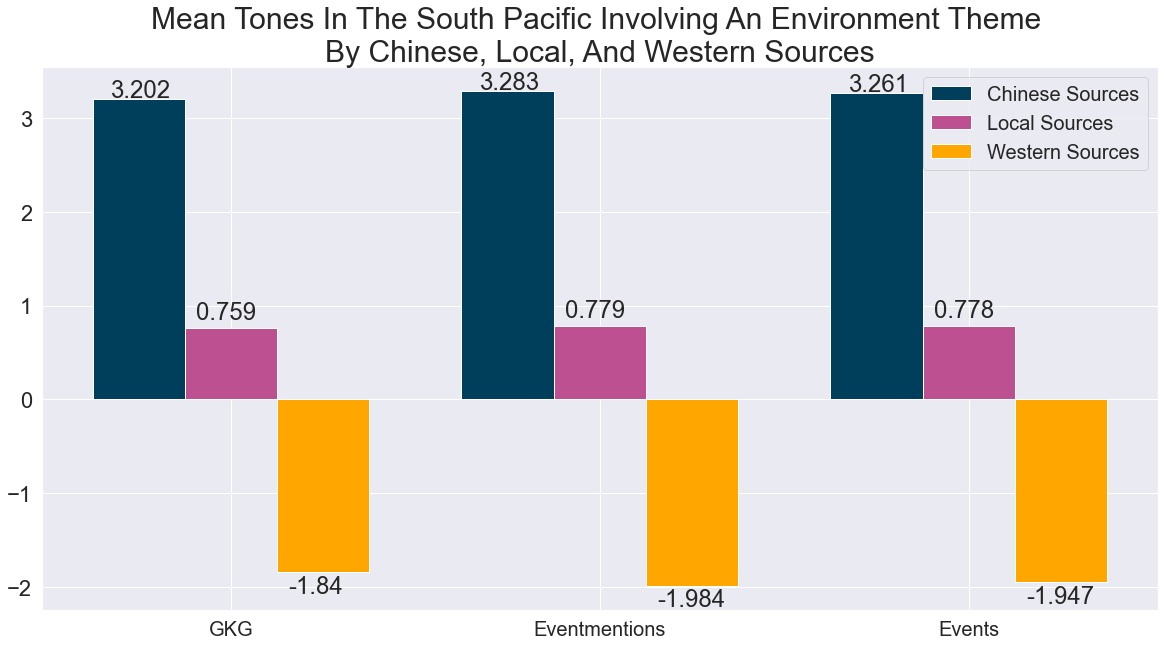

In [22]:
avg_chinese_tones_list = np.array(avg_chinese_tones).flatten()
avg_local_tones_list = np.array(avg_local_tones).flatten()
avg_western_tones_list = np.array(avg_western_tones).flatten()
labels = np.concatenate((avg_chinese_tones_list, avg_local_tones_list, avg_western_tones_list)).tolist()

fig, ax = plt.subplots()

x = np.arange(3)
width = 0.25
r1 = np.arange(3)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

ax.bar(r1, np.array(avg_chinese_tones).flatten().tolist(), color=color1, width=width, label='Chinese Sources')
ax.bar(r2, np.array(avg_local_tones).flatten().tolist(), color=color2, width=width, label='Local Sources')
ax.bar(r3, np.array(avg_western_tones).flatten().tolist(), color=color3, width=width, label='Western Sources')

ax.set_title('Mean Tones In The South Pacific Involving An Environment Theme \nBy Chinese, Local, And Western Sources', fontsize=30)
plt.xticks([r + width for r in range(3)], ['GKG','Eventmentions','Events'], fontsize=20)

# Add the labels  
for i, col in enumerate(ax.patches):
    if i < 3:
        plt.text(x = col.get_x()+0.05, y = col.get_height()+0.02, s=round(labels[i],3))
    elif i < 6:
        plt.text(x = col.get_x()+0.03, y = col.get_height()+0.1, s=round(labels[i],3))
    else:
        plt.text(x = col.get_x()+0.03, y = col.get_height()-0.22, s=round(labels[i],3))
        
ax.legend(fontsize='small');

We can see that Chinese news sources have an overall very positive tone, local sources have a slightly positive tone, and Western sources has a negative tone. While it is easy to speculate that these difference in tones are significant, it is hard to know if these difference in tones observed are by chance or if they are statistically significant.

Next, I will be doing statistical analysis on the difference in means between Western, Local, and Chinese sources.

<hr>

First, I will need to modify the data set to include an extra attribute to specify if the event is made by a Western, Chinese, or Local source. For this analysis, I will only be looking at the difference in means for the GKG tone and not the Eventmentions or Events tone.

In [23]:
# Copy the original data set
df2 = df.copy()

# Create a function to identify each source
def identifySource(column):
    if column in western_sources:
        return 'Western_Source'
    elif column in chinese_sources:
        return 'Chinese_Source'
    elif column in local_sources:
        return 'Local_Source'
    else:
        return None

# Apply the function
df2['Source'] = df2['SourceCommonName'].apply(identifySource)

# Compare the numbers counted from earlier in the report to new source counts
assert local_count == (df2['Source'] == 'Local_Source').sum()
assert western_count == (df2['Source'] == 'Western_Source').sum()
assert chinese_count == (df2['Source'] == 'Chinese_Source').sum()

In [24]:
# Filter the dataset to only contain those entries
local_mask = (df2['Source'] == 'Local_Source')
western_mask = (df2['Source'] == 'Western_Source')
chinese_mask = (df2['Source'] == 'Chinese_Source')

# Replace the old data set with the new filtered one
df2 = df2[ local_mask | western_mask | chinese_mask].copy()

# Print out the total number of observations
for i in range(3):
    print(df2['Source'].value_counts().index[i],'\t',df2['Source'].value_counts()[i])
print('The new dataset has {} observations\n'.format(df2.shape[0]))

Local_Source 	 10292
Western_Source 	 3348
Chinese_Source 	 1013
The new dataset has 14653 observations



Now that i have a dataset with the proper labels, I can now start to conduct a difference in means analysis. 

<h1> Difference in Means </h1>

When comparing more than two means, the first test i will do is an Analysis Of Variance (ANOVA) test. But before i can properly conduct one, we need to check the assumptions. 
1. Observations are independed of each other
2. The data is normally distributed (normality)
3. Homogeneity of variance

<b> Independence </b> <br>
We will assume independence of each event

<b> Normally Distributed Data </b> <br>
To check this condiditon, i will graph the distribution of data using a density plot and normality probability plot

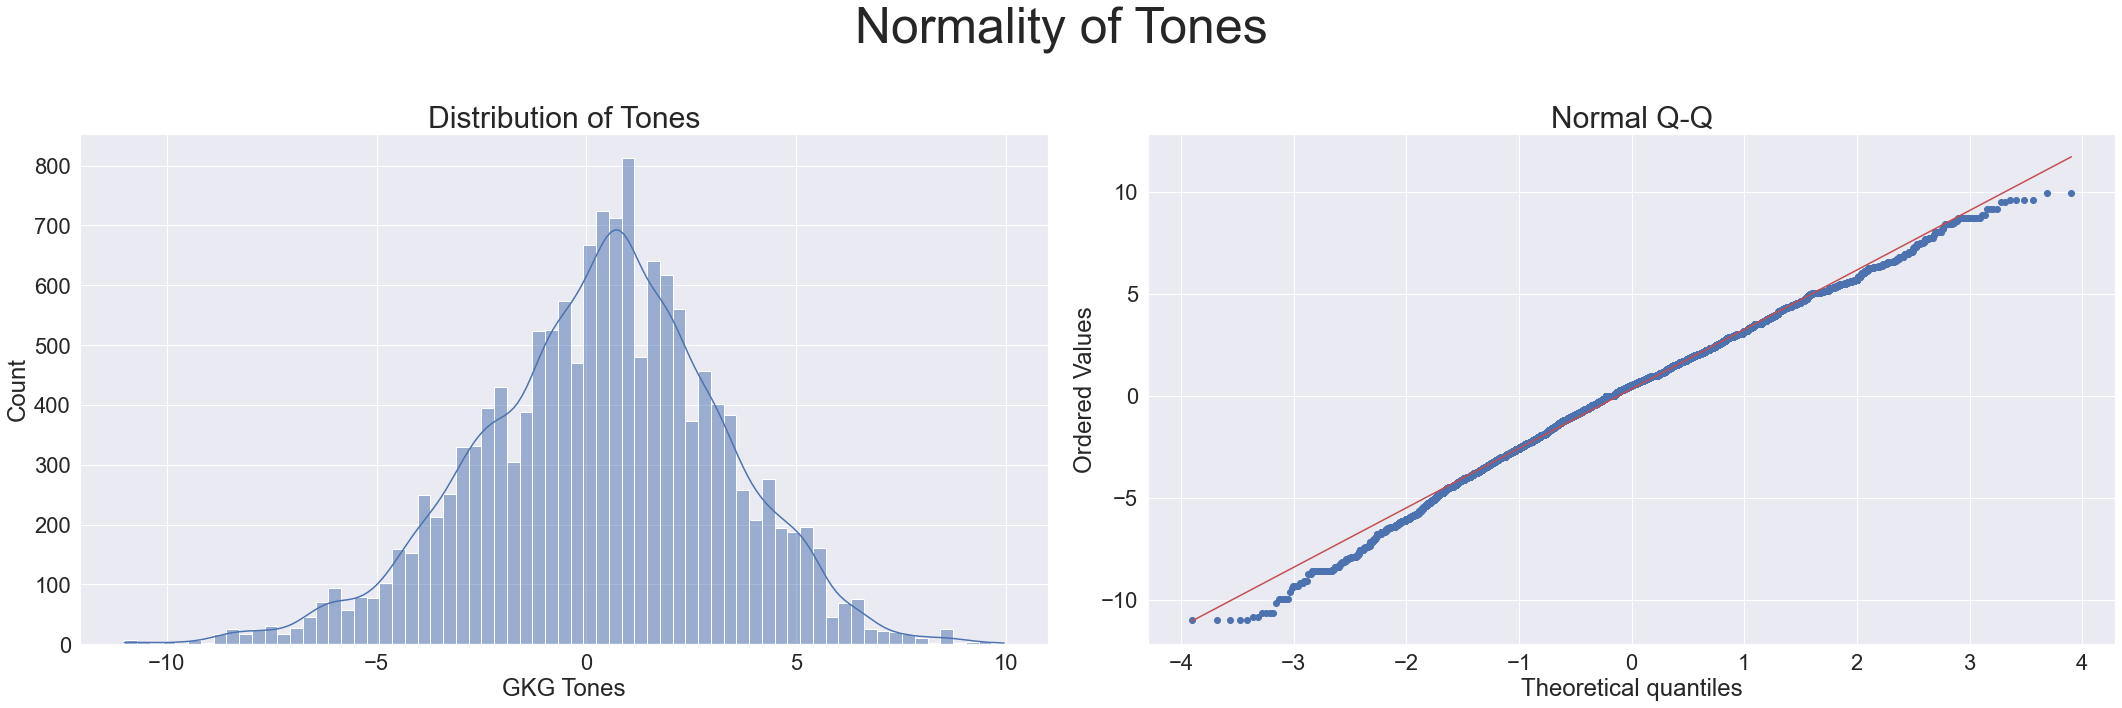

In [25]:
fig, axes = plt.subplots(1,2, figsize=(30,10))
sns.histplot(df2['GKG_Tone'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Tones', fontsize=30)
axes[0].set_xlabel('GKG Tones');

stats.probplot(df2['GKG_Tone'], dist="norm", plot=axes[1])
axes[1].set_title('Normal Q-Q', fontsize=30)
plt.suptitle('Normality of Tones',y=1, fontsize=50)
plt.tight_layout();

Our data follows a normal distribution

<b> Homogeneity of Variances </b> <br>
Next, i will conduct a <em>Levene Test</em> to test the homogeneity of variances of the residuals. <br>
First, i will need to set up my hypothesis and confidence level.

<b>Hypothesis</b>

$ H_o: \mu_W^2 = \mu_C^2 = \mu_L^2 $ <br>
$ H_a: \mu_W^2 \neq \mu_C^2 \neq \mu_L^2 $ <br>

<em> Note: I will use a 95% confidence interval </em>

In [26]:
# Conducting the Levene Test
stat, p_value = levene(df2['GKG_Tone'][western_mask].values, 
                 df2['GKG_Tone'][chinese_mask].values, 
                 df2['GKG_Tone'][local_mask].values)
print('The P-value of the Levene Test is {:.6f}'.format(p_value))

The P-value of the Levene Test is 0.000555


With a p-value much smaller than our alpha $ \alpha = 0.05 $, we have very strong evidence against the null hypothesis in favor of the alternative that at least one of the variances are unequal.

Because we have a normally distributed sample but unequal variances, i cannot use the ANOVA test to determine if the difference in means is significant. I will instead need to conduct a <em> Welch t-test </em> on each combination of means.

- Western Source \- Local Source
- Western Source \- Chinese Source
- Local Source \- Chinese Source

<h2> Welch's Test for Unequal Variances </h2>

<h3><em> Western Source - Local Source </em> </h3>

<b>Hypothesis</b> <br>

$ H_o: \mu_W =\mu_L $ <br>
$ H_a: \mu_W \neq \mu_L $ <br>

<em> Note: I will use a 95% confidence interval </em>

In [27]:
# Function to do the welch t-test
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(df2['GKG_Tone'][western_mask].values, df2['GKG_Tone'][local_mask].values)


 Welch's t-test= -49.8985 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 5624.8116


With a p-value of <b>0</b>, we can reject the null hypothesis in support of the alternative. 

<h3><em> Western Source - Chinese Source </em> </h3>

<b>Hypothesis</b> <br>

$ H_o: \mu_W =\mu_C $ <br>
$ H_a: \mu_W \neq \mu_C $ <br>

<em> Note: I will use a 95% confidence interval </em>

In [28]:
welch_ttest(df2['GKG_Tone'][western_mask].values, df2['GKG_Tone'][chinese_mask].values)


 Welch's t-test= -53.9469 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 1684.6438


With a p-value of <b>0</b>, we can reject the null hypothesis in support of the alternative. 

<h3><em> Local Source - Chinese Source </em> </h3>

<b>Hypothesis</b> <br>

$ H_o: \mu_L =\mu_C $ <br>
$ H_a: \mu_L \neq \mu_C $ <br>

<em> Note: I will use a 95% confidence interval </em>

In [29]:
welch_ttest(df2['GKG_Tone'][local_mask].values, df2['GKG_Tone'][chinese_mask].values)


 Welch's t-test= -28.5362 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 1218.8821


With a p-value of <b>0</b>, we can reject the null hypothesis in support of the alternative. 

Because each group failed to reject the null hypothesis, we can conclude that there is a difference in means between Western, Local, and Chinese news sources.

<h1> Conclusion </h1>

In this report, I introduce GDELT and how GDELT can be used to track events in regions of the world. I talked about the three tables (Events, Eventmentions, GKG) we used in this research, how they all relate, and which attributes were important for this research. I showed how I found the exact locations and actors within GDELT using GDELT itself and Wikipedia. I mentioned which countries and territories we included in this research and some that we did not. I showed the queries used to pull our data set from BigQuery. I showed the number of articles within GDELT that have an event located in the South Pacific only accounts for 0.08\% of the articles within GDELT itself, of the 4.32 million articles in our data set, only 14.43\% involve an environmental theme, and when a great power was an actor in an event in the South Pacific, 27.02\% of those events had an environmental theme. 

Next, I showed all the methods I used to develop our final data set. I gave explanations on which attributes I decided to choose for our filtering and how I used Python for all of my data wrangling, exploration, and most of the visualizations. I explained why we chose our media sources and how I calculated our average tones for each source. I then showed that Chinese sources have an overall very positive tone in the South Pacific when the event itself involves the environment, Local news sources have a positive to neutral tone, and Western sources have a negative tone. And finally, I proved the mean tones of Chinese, Local, and Western new sources are statistically different.

<h1>Acknowledgment</h1>

I would like to thank Dr. Elizabeth Gooch from the Naval Postgraduate School for mentoring me and the Undergraduate Research Opportunity Center (UROC) Program at California State University, Monterey Bay for providing me a scholarship for this research.

<h4>References</h4>
[1] https://www.gdeltproject.org/about.html <br>
[2] https://www.gdeltproject.org/ <br>
[3] http://data.gdeltproject.org/documentation/GDELT-Global\_Knowledge\_Graph\_Codebook-V2.1.pdf<br>
[4] http://data.gdeltproject.org/documentation/GDELT-Event\_Codebook-V2.0.pdf <br>
[5] https://en.wikipedia.org/wiki/Oceania <br>
[6] https://blog.gdeltproject.org/introducing-gkg-2-0-the-next-generation-of-the-gdelt-global-knowledge-graph/